In [37]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [38]:
# Load data
samples = np.load('data/suit_samples.npy')
labels = np.load('data/suit_labels.npy')
print(samples.shape)
print(labels.shape)

(2740, 34, 34)
(2740,)


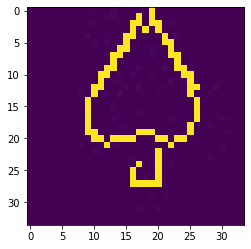

In [39]:
# Visualize a sample
plt.imshow(samples[0])

In [40]:
# Shuffle data
indices = np.arange(samples.shape[0])
np.random.shuffle(indices)
samples = samples[indices]
labels = labels[indices]

In [41]:
# Split data
ratio = 0.9
split = int(samples.shape[0] * ratio)
x_train = samples[:split]
y_train = labels[:split]
x_test = samples[split:]
y_test = labels[split:]

In [42]:
# Choose layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(34, 34)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(4)
])

In [43]:
# Choose loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [44]:
# Choose optimizer
opt = 'adam'

In [45]:
# Compile model
model.compile(optimizer=opt, loss=loss_fn, metrics=['accuracy'])

In [46]:
# Train model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
78/78 [==============================] - 1s 3ms/step - loss: 13.2755 - accuracy: 0.8706
Epoch 2/5
78/78 [==============================] - 0s 3ms/step - loss: 1.1815 - accuracy: 0.9761
Epoch 3/5
78/78 [==============================] - 0s 3ms/step - loss: 0.5653 - accuracy: 0.9797
Epoch 4/5
78/78 [==============================] - 0s 2ms/step - loss: 0.2625 - accuracy: 0.9927
Epoch 5/5
78/78 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9976


In [47]:
# Evaluate model
model.evaluate(x_test,  y_test, verbose=2)

9/9 - 0s - loss: 2.1792 - accuracy: 0.9745 - 142ms/epoch - 16ms/step


[2.1791718006134033, 0.974452555179596]

In [48]:
# Save model
model.save('suit_model')

INFO:tensorflow:Assets written to: suit_model\assets
